# Air Quality and Health Impact

## Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)

from keras.models import Sequential
from keras.layers import (
    Dense, Dropout
)
from keras.callbacks import (
    EarlyStopping,
    ReduceLROnPlateau
)

from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

## Download dos dados

In [ ]:
!kaggle datasets download -d rabieelkharoua/air-quality-and-health-impact-dataset
!unzip /content/air-quality-and-health-impact-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/air-quality-and-health-impact-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
air-quality-and-health-impact-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/air-quality-and-health-impact-dataset.zip
  inflating: air_quality_health_impact_data.csv  


## Carregamento e pequena análise

In [ ]:
# Carregando e mostrando os 5 primeiros registros

df = pd.read_csv('/content/air_quality_health_impact_data.csv')
df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [ ]:
# Mostrando nome das colunas da base de dados

print('O nome das colunas são: ')
for col in df.columns:
    print(col, end= ', ')

O nome das colunas são: 
RecordID, AQI, PM10, PM2_5, NO2, SO2, O3, Temperature, Humidity, WindSpeed, RespiratoryCases, CardiovascularCases, HospitalAdmissions, HealthImpactScore, HealthImpactClass, 

In [ ]:
# Descrição da base de dados
df.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


In [ ]:
# Informações da base de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [ ]:
# Verificando a existência de valore nulos

df.isnull().sum()

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

In [ ]:
# Excluindo a coluna RecordID

if 'RecordID' in df.columns:
    df.drop('RecordID', axis=1, inplace=True)
else:
    print('A coluna RecordID não existe na base de dados.')
df.head()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


## Análise das colunas

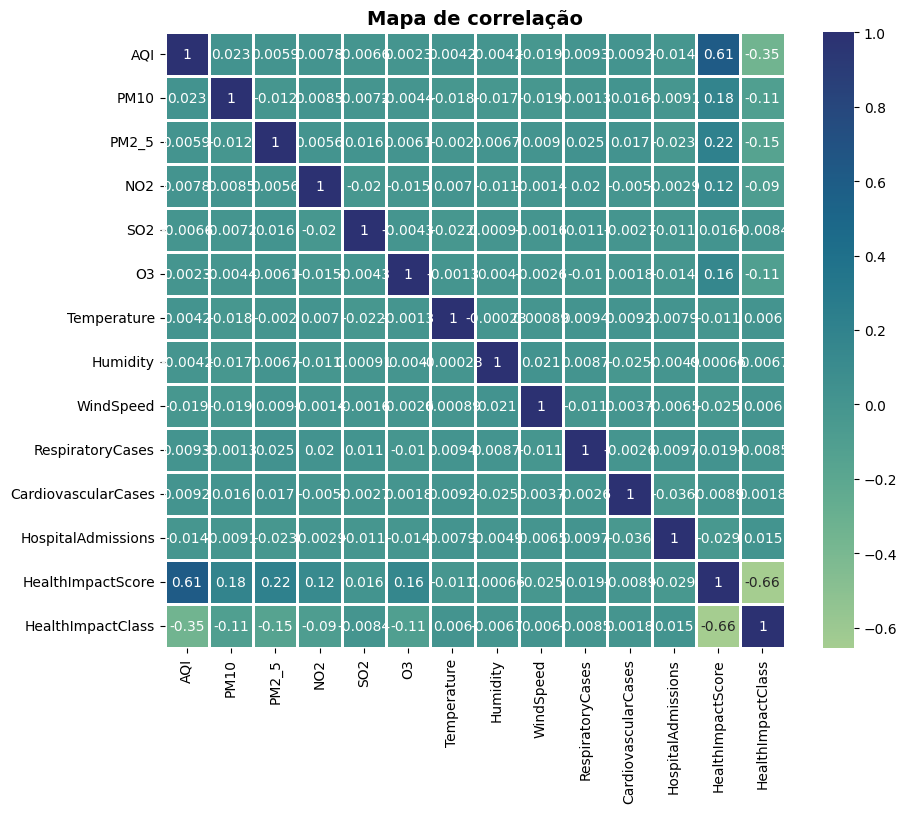

In [ ]:
# Mapa de correlação da base de dados

plt.figure(figsize= (10, 8))
plt.title('Mapa de correlação', fontweight= 'bold', fontsize= 14)
sns.heatmap(df.corr(), annot= True, cmap= 'crest', linewidth= 1)
plt.show()

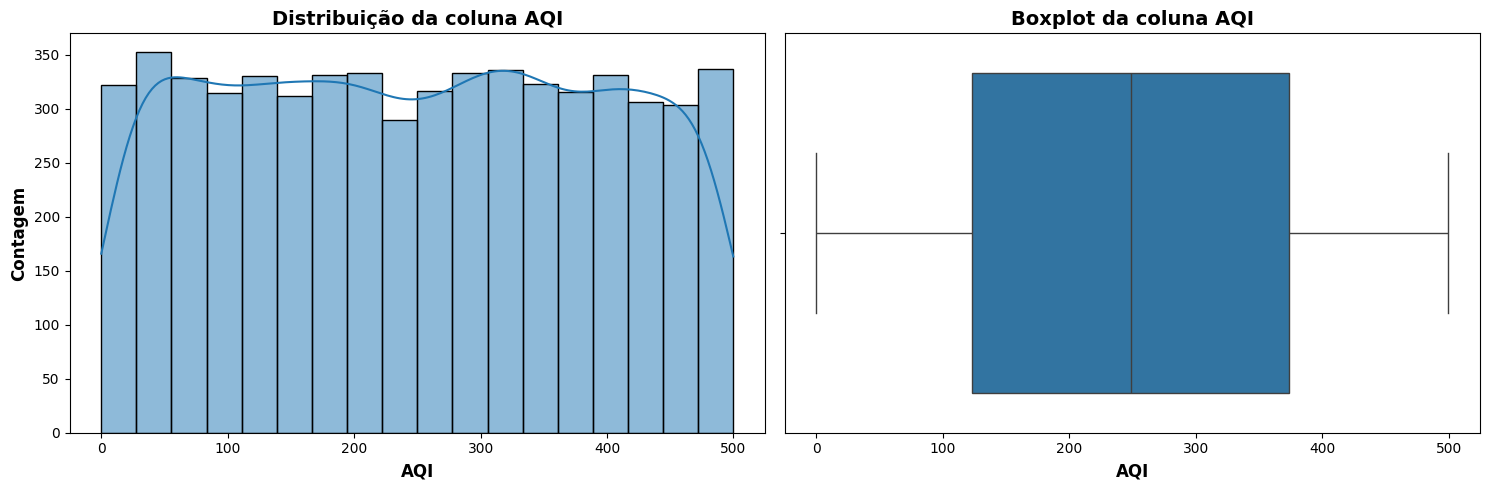

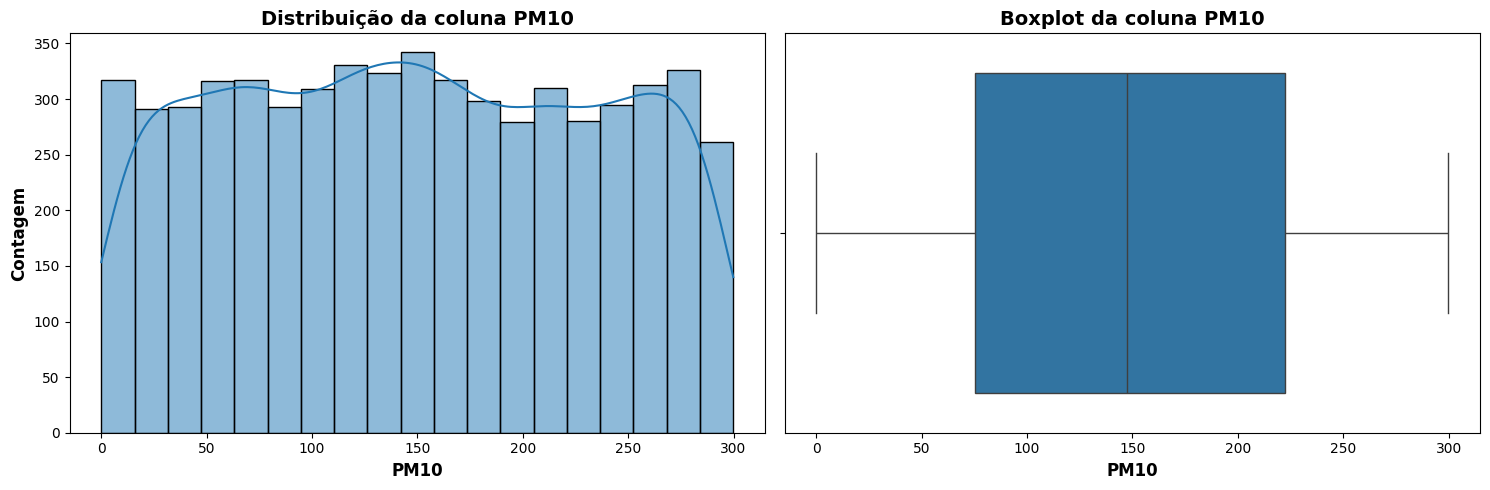

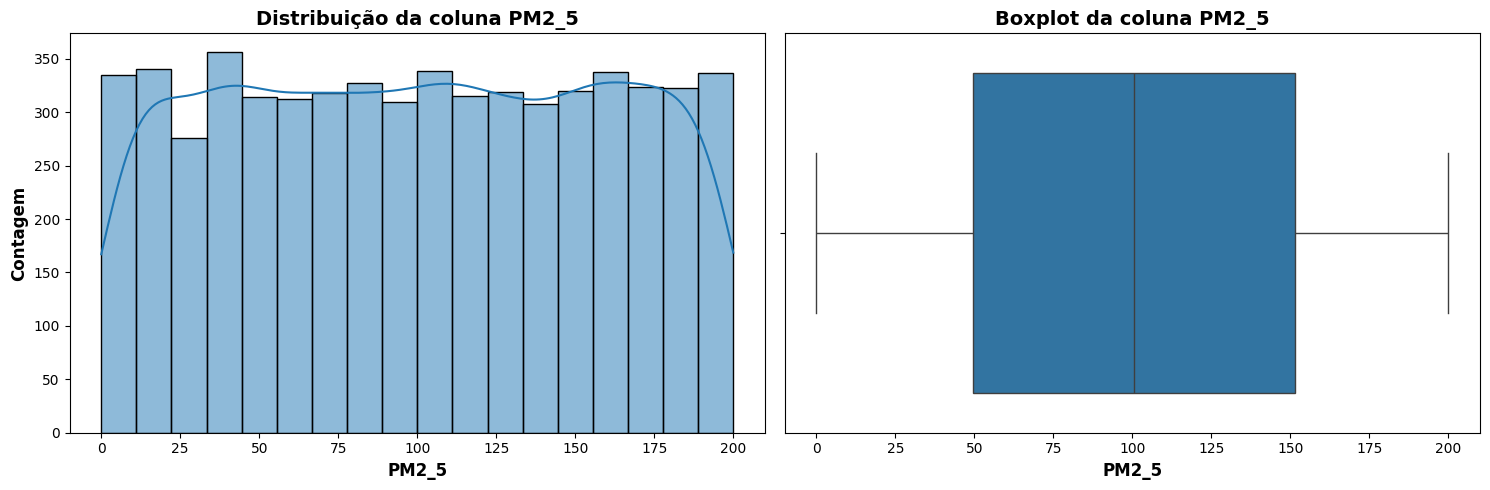

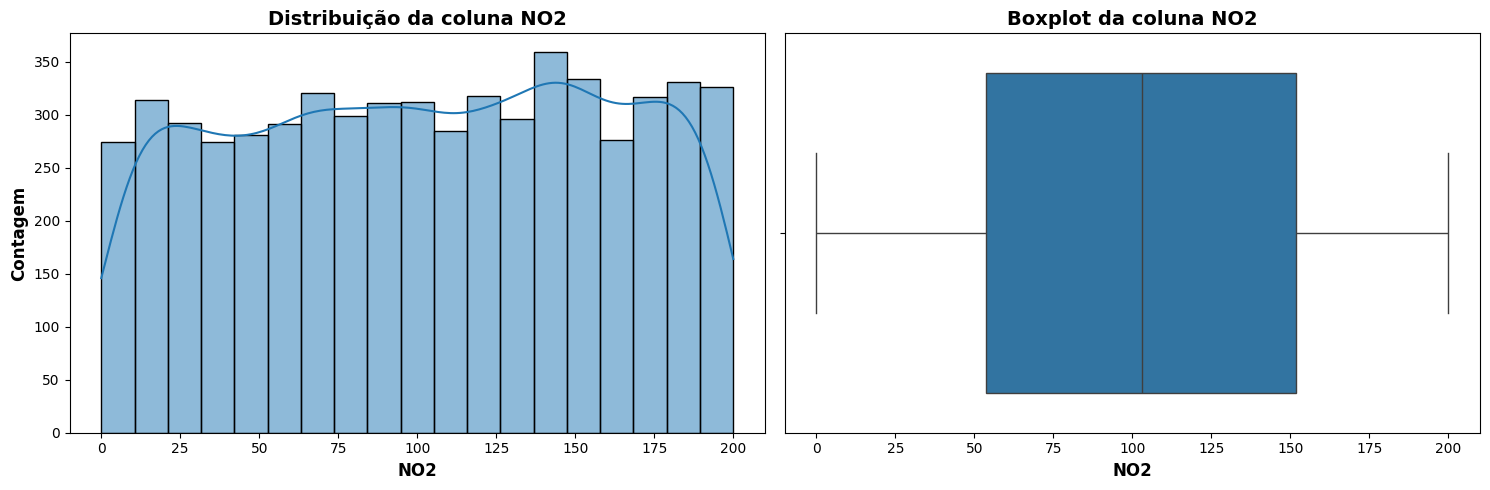

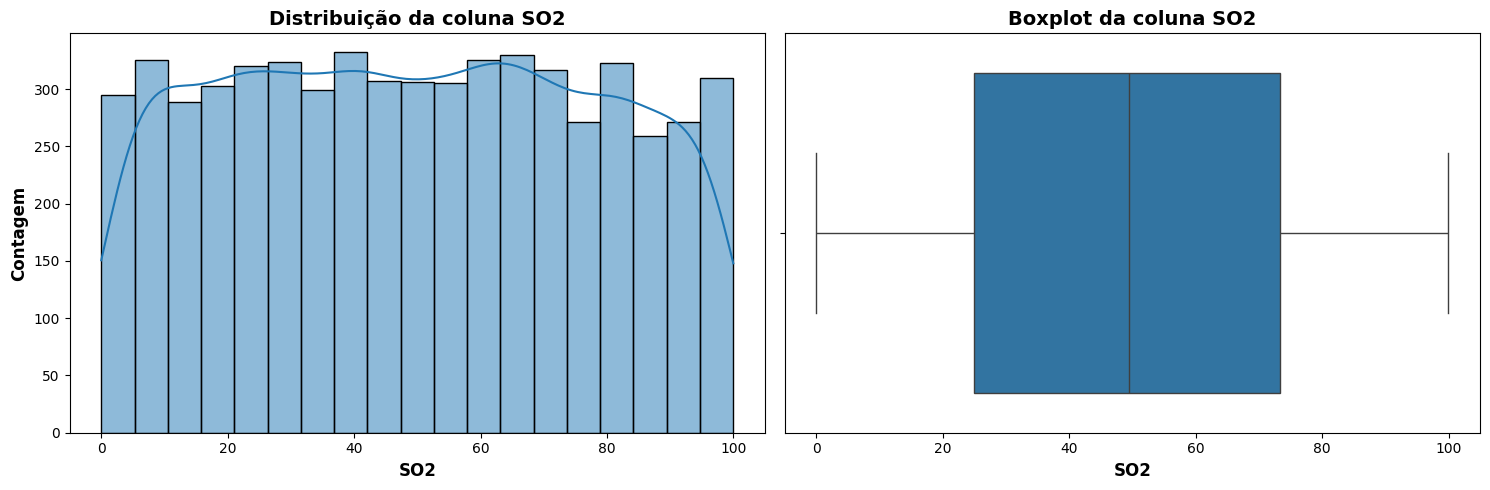

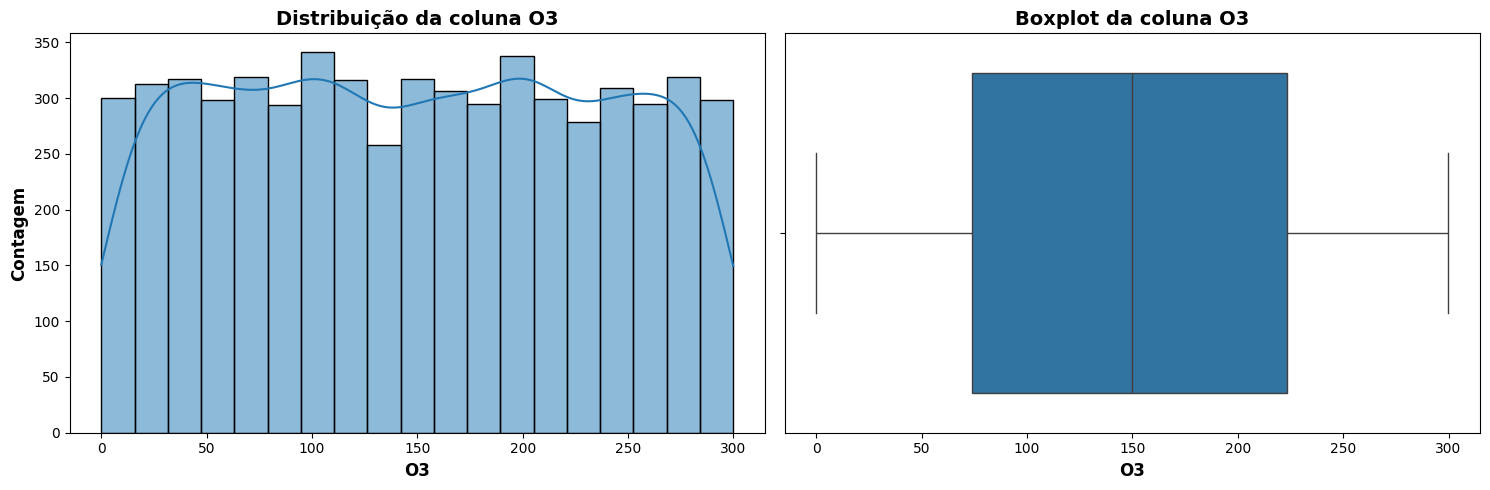

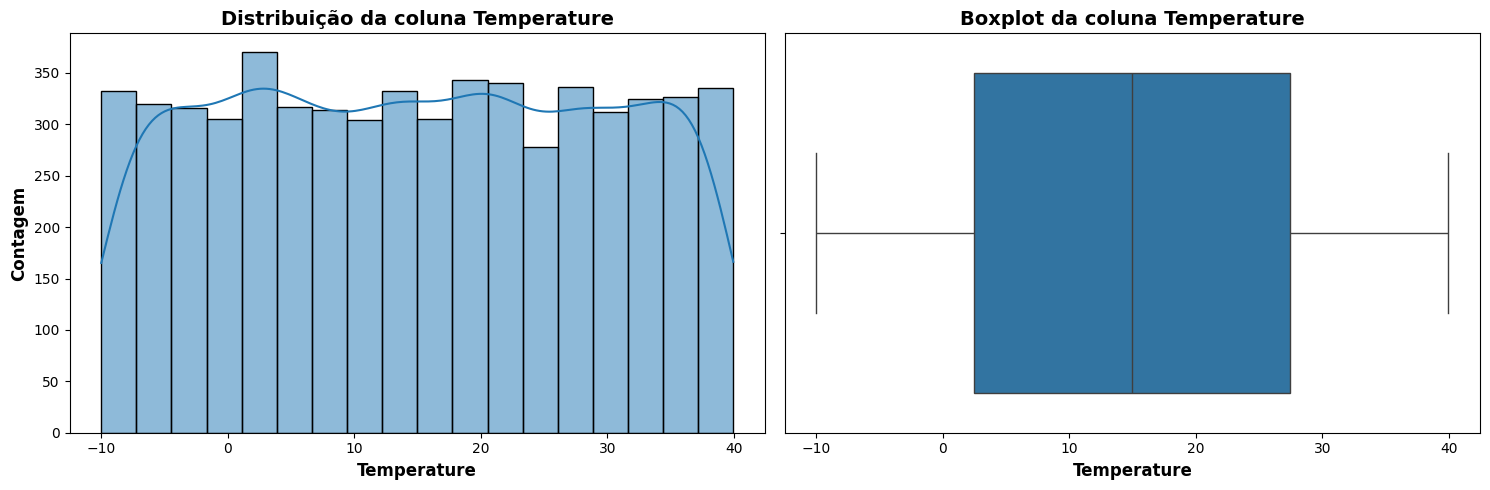

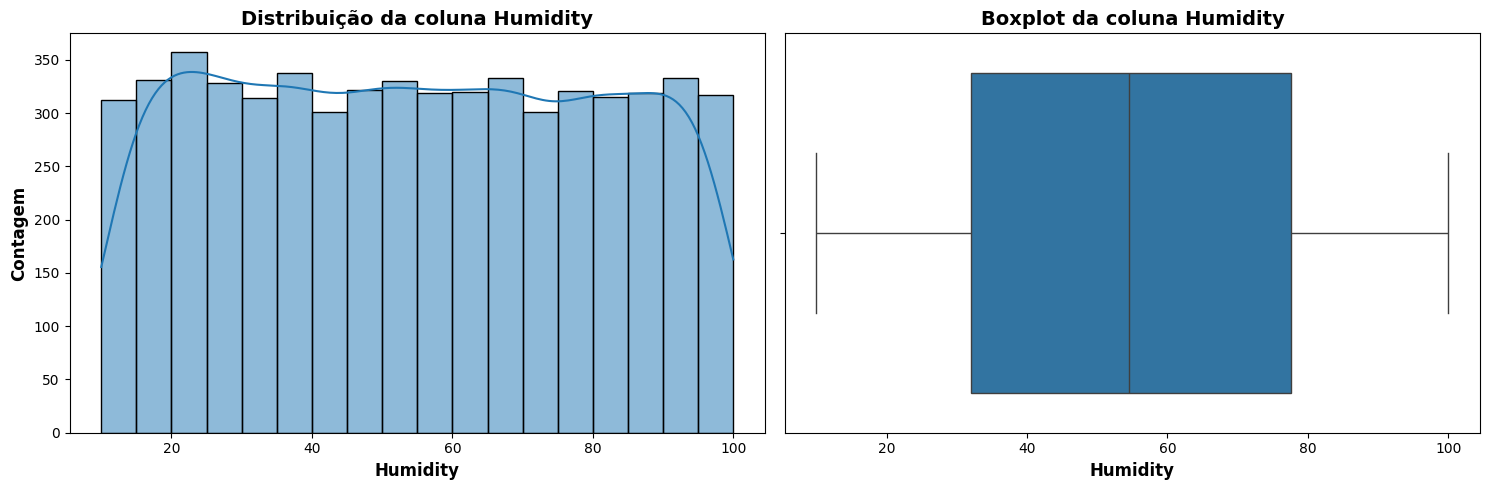

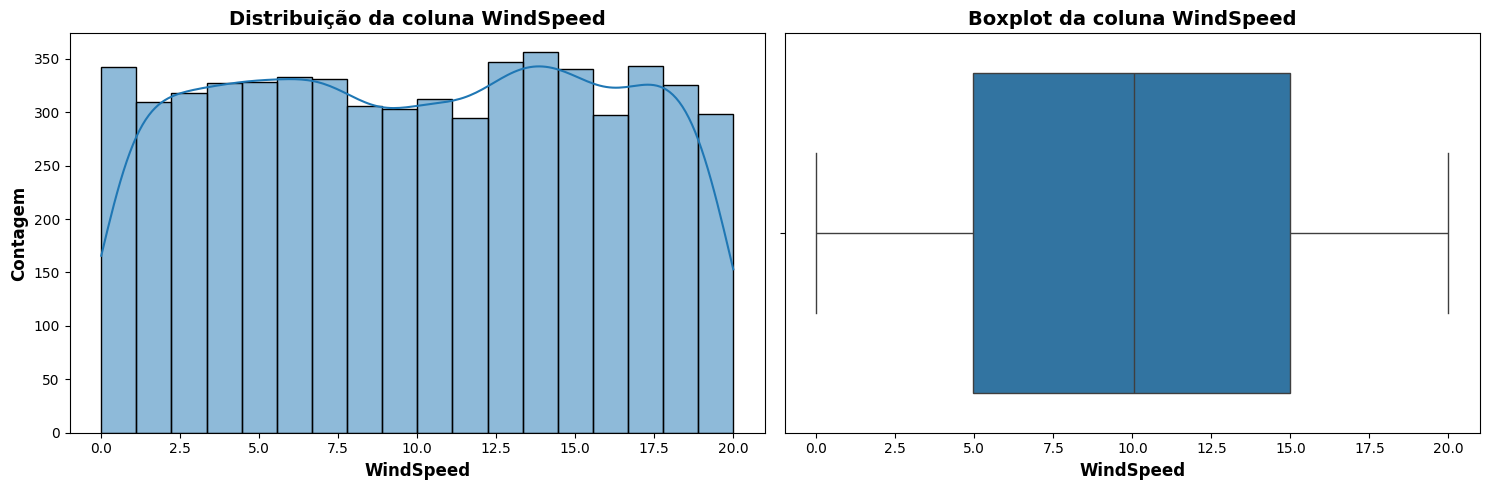

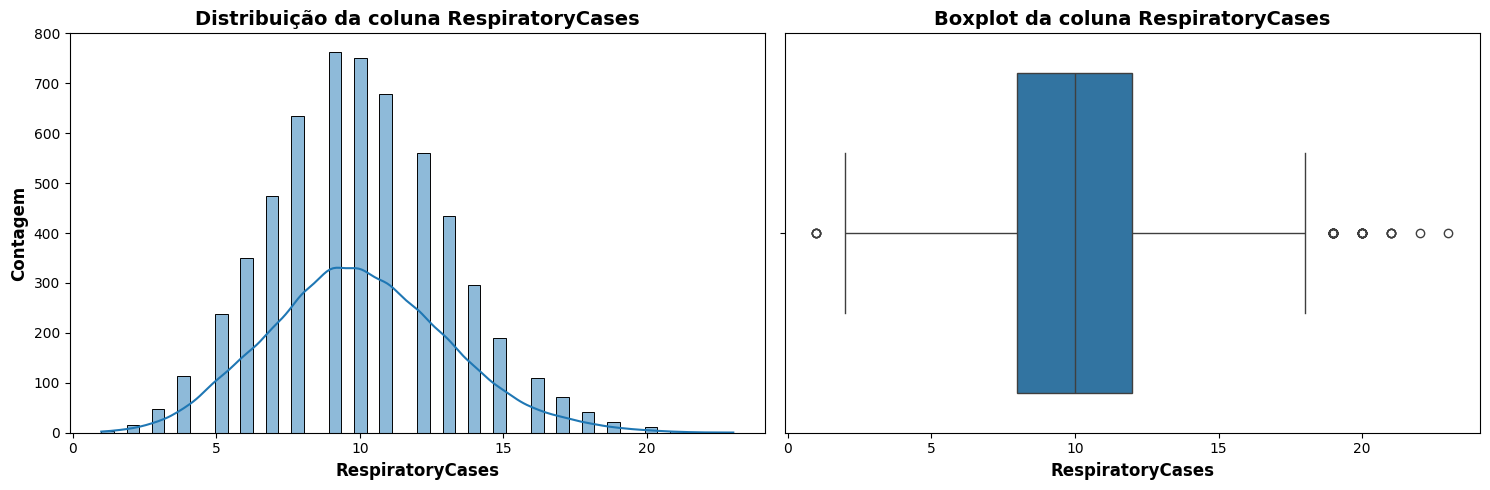

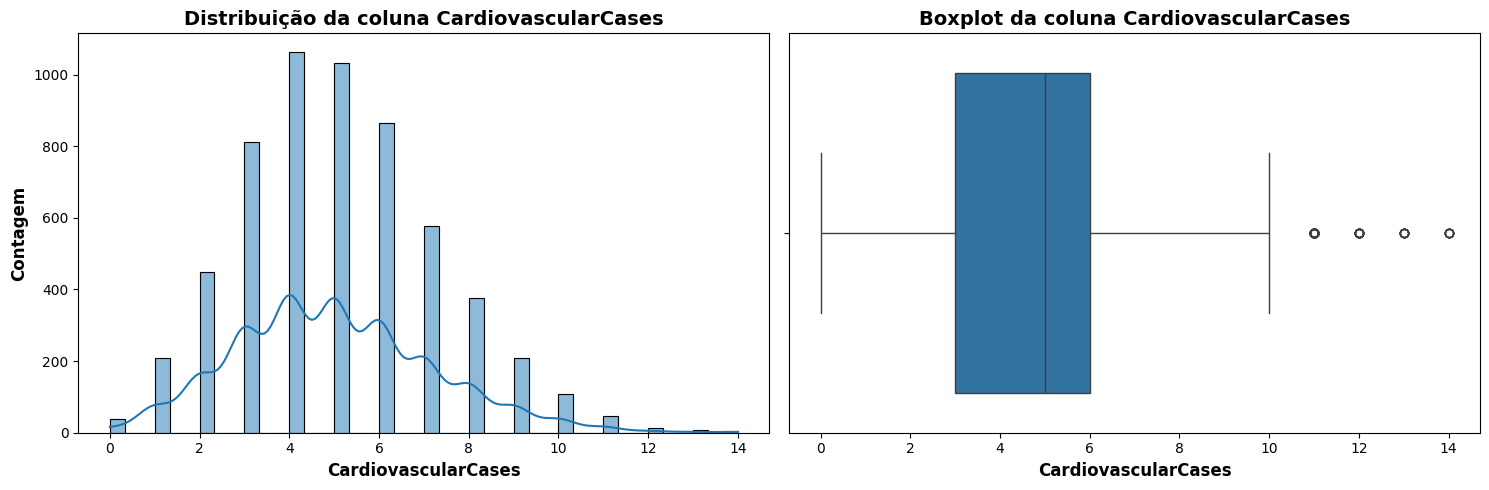

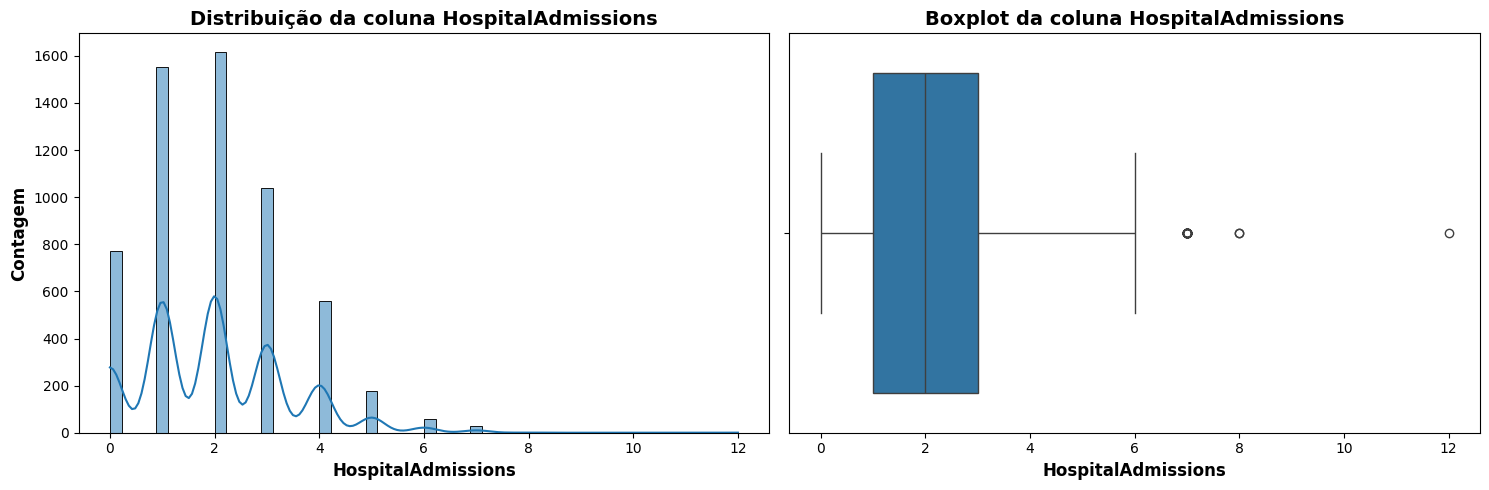

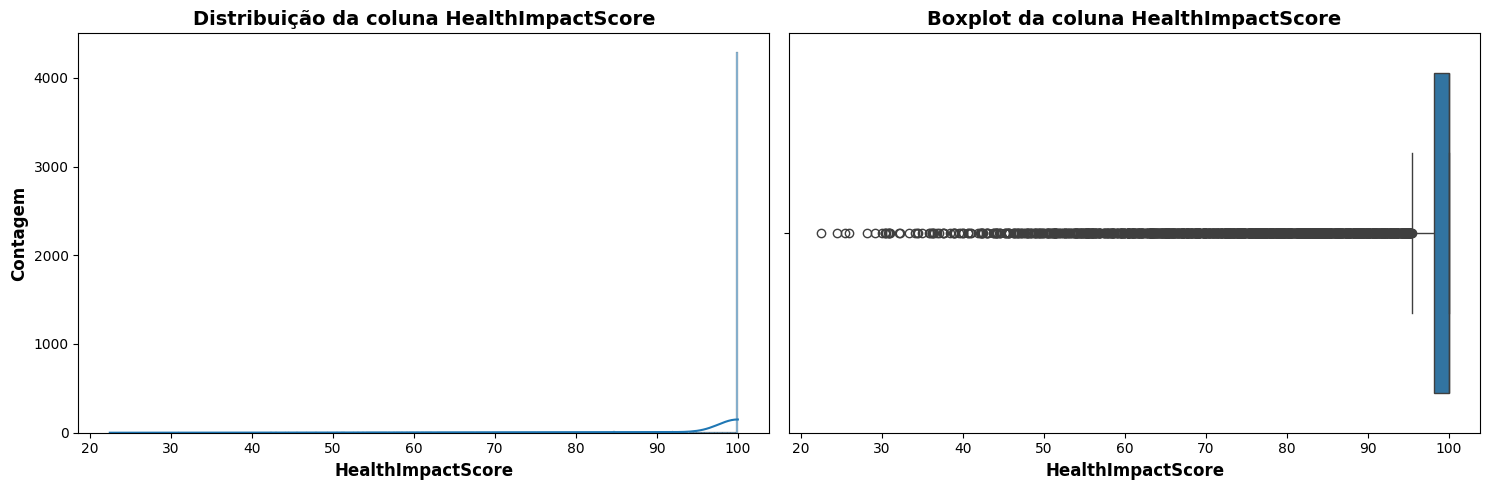

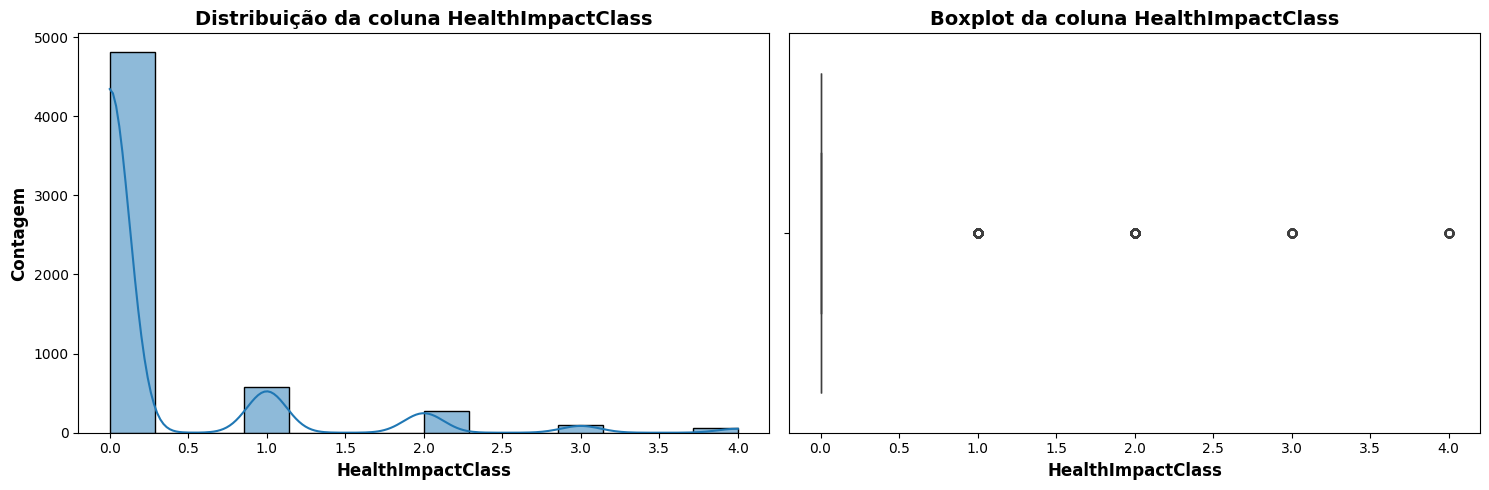

In [ ]:
# Gráfico de distribuição e box plot das colunas

colunas_numericas = df.select_dtypes(include= 'number')

for col in colunas_numericas.columns:
    plt.figure(figsize= (15, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde= True)
    plt.title(f'Distribuição da coluna {col}', fontsize= 14, fontweight= 'bold')
    plt.xlabel(col, fontsize= 12, fontweight= 'bold')
    plt.ylabel('Contagem', fontsize= 12, fontweight= 'bold')


    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot da coluna {col}', fontsize= 14, fontweight= 'bold')
    plt.xlabel(col, fontsize= 12, fontweight= 'bold')

    # Ajustando o layout para evitar sobreposição
    plt.tight_layout()

    # Salvando a imagem
    # plt.savefig(f'{col}.png')

    plt.show()

## Divisão das bases e colocando em mesma escala

In [ ]:
# Função para mudar para String as colunas alvo

def rename_impact_class(number):
    if number == 0:
        return 'Very High'
    elif number == 1:
        return 'High'
    elif number == 2:
        return 'Moderate'
    elif number == 3:
        return 'Low'
    else:
        return 'Very Low'

In [ ]:
colunas_alvo = ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity',
       'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions']

x = df[colunas_alvo]
y = df['HealthImpactClass']

print(f'O shape da variável X é: {x.shape}')
print(f'O shape da variável Y é: {y.shape}')

O shape da variável X é: (5811, 12)
O shape da variável Y é: (5811,)


In [ ]:
# Normalizando a base

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# Aplicando o padrão OneHot nas saídas

y_dummy = to_categorical(y)

In [ ]:
# Dividindo entre bases de treino e teste

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_dummy, random_state= 42, test_size= 0.2)
print(f'O shape das variáveis de treino é: {X_train.shape}, {y_train.shape}')
print(f'O shape das variáveis de teste é: {X_test.shape}, {y_test.shape}')

O shape das variáveis de treino é: (4648, 12), (4648, 5)
O shape das variáveis de teste é: (1163, 12), (1163, 5)


In [ ]:
# Salvando as variáveis

with open('healthimpact.pkl', 'wb') as f:
    pickle.dump([X_train, X_test, y_train, y_test], f)

## Criação do modelo usando Keras/Tensor Flow

In [ ]:
X_train.shape[1]

12

In [ ]:
elementos_unicos = np.unique(y)
elementos_unicos

array([0., 1., 2., 3., 4.])

In [ ]:
# Criando as callbacks

es = EarlyStopping(monitor='loss', min_delta=1e-10, patience=10, verbose=1)  # EarlyStopping: interrompe o treinamento se a perda (loss) não melhorar após 10 épocas consecutivas
rlr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, verbose=1)  # ReduceLROnPlateau: reduz a taxa de aprendizado se a perda não melhorar após 5 épocas consecutivas

In [ ]:
# Criando o modelo e suas camadas

model = Sequential()
model.add(Dense(units= 64, activation= 'relu', input_dim= X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units= 32, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units= len(elementos_unicos), activation= 'softmax'))
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['categorical_accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size= 8, callbacks= [es, rlr], validation_data= (X_test, y_test))

NameError: name 'Sequential' is not defined

In [ ]:
# Obtendo o historico de accuracy e loss

model_accuracy = history.history['categorical_accuracy']
model_val_accuracy = history.history['val_categorical_accuracy']
model_loss = history.history['loss']
model_val_loss = history.history['val_loss']

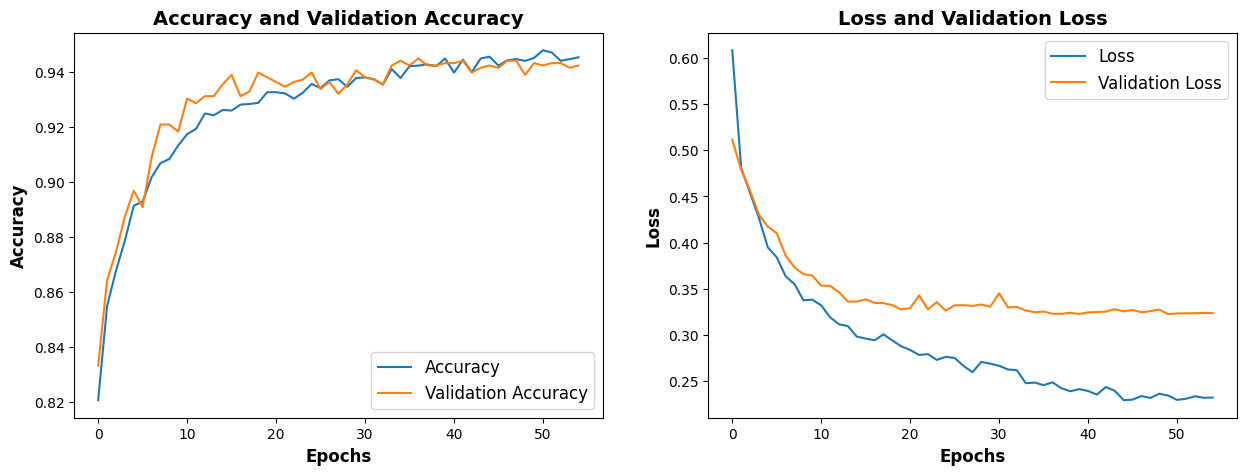

In [ ]:
# Criando figuras do historicos de valores

plt.figure(figsize= (15, 5))
plt.subplot(1, 2, 1)
plt.plot(model_accuracy, label= 'Accuracy')
plt.plot(model_val_accuracy, label= 'Validation Accuracy')
plt.title('Accuracy and Validation Accuracy', fontsize= 14, fontweight= 'bold')
plt.xlabel('Epochs', fontsize= 12, fontweight= 'bold')
plt.ylabel('Accuracy', fontsize= 12, fontweight= 'bold')
plt.legend(fontsize= 'large')

plt.subplot(1, 2, 2)
plt.plot(model_loss, label= 'Loss')
plt.plot(model_val_loss, label= 'Validation Loss')
plt.title('Loss and Validation Loss', fontsize= 14, fontweight= 'bold')
plt.legend(fontsize= 'large')
plt.xlabel('Epochs', fontsize= 12, fontweight= 'bold')
plt.ylabel('Loss', fontsize= 12, fontweight= 'bold')
plt.savefig('historico.png')
plt.show()

In [ ]:
# Prevendo novos valores

predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis= 1)
y_test_original = np.argmax(y_test, axis= 1)

37/37 [==============================] - 0s 2ms/step


In [ ]:
# Accuracy score

accuracy = accuracy_score(y_test_original, predictions)
print(f'A acurácia do modelo é: {accuracy}')

A acurácia do modelo é: 0.942390369733448


In [ ]:
# Classification Report

print(f'Classification Report: \n\n {classification_report(y_test_original, predictions)}')

Classification Report: 

               precision    recall  f1-score   support

           0       0.95      1.00      0.98       953
           1       0.92      0.86      0.89       124
           2       0.76      0.72      0.74        53
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        13

    accuracy                           0.94      1163
   macro avg       0.53      0.52      0.52      1163
weighted avg       0.91      0.94      0.93      1163



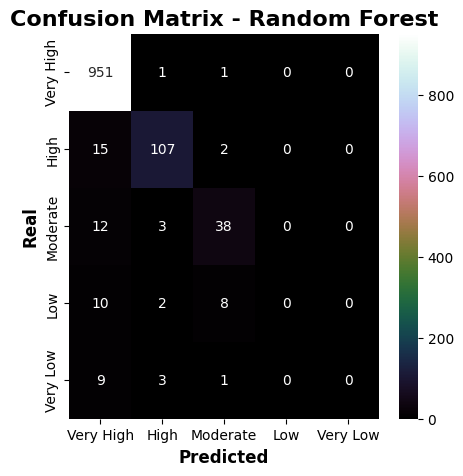

In [ ]:
# Matriz de Confusão

cm = confusion_matrix(y_test_original, predictions)
tags = ['Very High', 'High', 'Moderate', 'Low', 'Very Low'] # tags da matriz

plt.figure(figsize= (5, 5)) # criando figura e definindo tamanho
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'cubehelix', xticklabels= tags, yticklabels= tags) # criando matriz mostrando os números em inteiro, passando tags e mudando cor
plt.title('Confusion Matrix - Random Forest', fontsize= 16, fontweight= 'bold') # adicionado título
plt.xlabel('Predicted', fontsize= 12, fontweight= 'bold') # definindo eixo X
plt.ylabel('Real', fontsize= 12, fontweight= 'bold') # definindo eixo Y
plt.show() # plotando a figura